# LOCANA
Locana dibuat menggunakan pembelajaran mesin untuk memprediksi pergantian keanggotaan berbayar dalam e-commerce dan untuk mengidentifikasi segmentasi keanggotaan dan rekomendasi segmentasinya.

>Project by:
- [Muhammad Azhar Khaira](https://www.linkedin.com/in/azharkhaira/) (Data Scientist)
- [Yuzal Qushoyyi Wahyudi](https://www.linkedin.com/in/yuzalqushoyyiwahyudi/) (Data Engineer)
- [Astrila Ikhlasia Eprina](https://www.linkedin.com/in/astrilalia/) (Data Analyst)

# A. Pendahuluan
### (EDA Setelah Clustering)

**Ringkasan Data:**
- Sumber dataset: [Kaggle - Customer Churn Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)
- Dataset ini berguna untuk menganalisis dan memprediksi churn pelanggan, yaitu situasi di mana pelanggan berhenti menggunakan layanan suatu perusahaan.
- Nama kolom dan isi kolom pada Dataset ini:

| Nama Kolom | Keterangan Isi Kolom|
| -----------| ----------|
|1. **CustomerID** | ID unik untuk setiap pelanggan.|
|2. **Age** | Usia pelanggan. (per tahun)|
|3. **Gender** | Jenis kelamin pelanggan. (Male/Female)|
|4. **Tenure** | Lama pelanggan berlangganan. (per bulan)|
|5. **Usage Frequency** | Frekuensi penggunaan layanan oleh pelanggan. (per bulan)|
|6. **Support Calls** | Jumlah panggilan yang dilakukan pelanggan pada customer support.|
|7. **Payment Delay** | Jumlah hari keterlambatan pembayaran oleh pelanggan. (per hari)|
|8. **Subscription Type** | Tipe langganan pelanggan (misalnya, Basic, Standard).|
|9. **Contract Length** | Durasi kontrak langganan (misalnya, Monthly, Annual).|
|10. **Total Spend** | Total pengeluaran pelanggan selama berlangganan. (per bulan)|
|11. **Last Interaction** | Jumlah hari sejak interaksi terakhir pelanggan dengan layanan. (per hari)|
|12. **Churn** _(Target)_ | Status apakah pelanggan berhenti berlangganan atau tidak (1 untuk churn, 0 untuk tidak).|

#### A.1. **Latar Belakang**
- Berdasarkan publikasi statistik dari Kementerian Perdagangan tentang **PERDAGANGAN DIGITAL (_E-COMMERCE_) INDONESIA PERIODE 2023**, menyatakan bahwa _e-commerce_ di Indonesia telah mengalami pertumbuhan yang signifikan dari 2019 hingga 2023, menjadikannya salah satu pasar _e-commerce_ terbesar di Asia Tenggara. Peningkatan akses internet, adopsi _smartphone_, dan perubahan perilaku konsumen telah mendorong perkembangan ini. Namun, meskipun pasar _e-commerce_ di Indonesia berkembang pesat, perusahaan-perusahaan _e-commerce_ menghadapi tantangan besar, salah satunya adalah `churn pelanggan`.

#### A.2. **Pernyataan Masalah**
- Pelanggan adalah aset penting bagi perusahaan, dan perpindahan pelanggan (customer churn) dapat mengancam keberlanjutan bisnis, terutama dalam industri _e-commerce_ yang kompetitif. Tingginya biaya akuisisi pelanggan baru dan dampak negatif churn terhadap pendapatan dan reputasi, penting bagi perusahaan untuk mengembangkan model prediksi churn yang efektif.

#### A.3. **Objektif**
- Membuat model prediksi dan model clustering yang bertujuan untuk memprediksi churn dan memberikan rekomendasi untuk toko online guna membantu perusahaan _e-commerce_ dalam mempertahankan pelanggan dan mengurangi risiko kehilangan pangsa pasar.


# B. Import Libraries

In [1]:
# For basic
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# C. Data Loading

In [55]:
# Load Data
df_clustered = pd.read_csv('dataset/df_clustered.csv')
df_clustered

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn,cluster
0,30,Female,39,14,5,18,Standard,Annual,932.00,17,1,2
1,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1,3
2,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1,3
3,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1,3
4,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,42,Male,54,15,1,3,Premium,Annual,716.38,8,0,1
440828,25,Female,8,13,1,20,Premium,Annual,745.38,2,0,1
440829,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0,1
440830,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0,1


# D. EDA Cluster

Text(0.5, 1.0, 'Heatmap Nilai Rata-rata tiap Cluster')

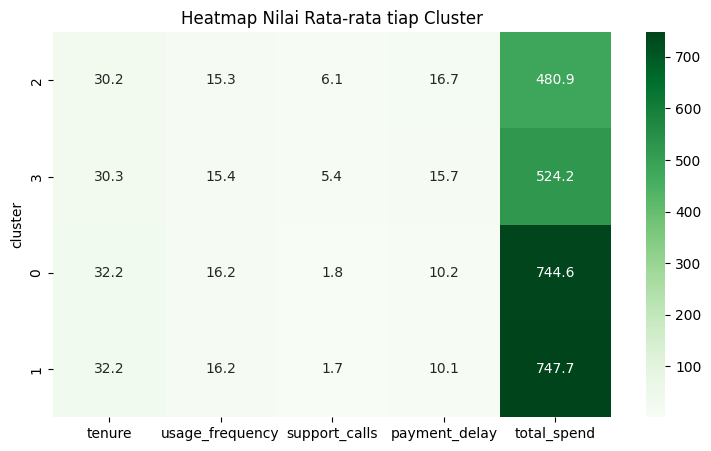

In [56]:
# Heatmap rata-rata tiap cluster
mean = df_clustered.groupby('cluster')[['tenure', 'usage_frequency','support_calls','payment_delay','total_spend']].mean().sort_values('total_spend')
fig = plt.figure(figsize = (9,5))
sns.heatmap(data = mean , cmap = 'Greens' , annot = True, fmt = ".1f" )
plt.title('Heatmap Nilai Rata-rata tiap Cluster')

- Cluster 1 merupakan kelompok customer yang memiliki total spend paling besar dibanding 3 cluster lainnya.
- Disusul dengan cluster 0, kemudian cluster 3 dan yang paling sedikit total spendnya adalah cluster 2.
- Urutannya (cluster 1, cluster 0, cluster 3, cluster 2).

## D.1. Cluster 0

In [57]:
# describe cluster 0
cluster_0 = df_clustered[df_clustered["cluster"] == 0]
cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
age,91218.0,36.426878,9.741690,18.0,29.0000,37.00,44.0000,65.0
tenure,91218.0,32.214092,17.134211,1.0,18.0000,33.00,47.0000,60.0
usage_frequency,91218.0,16.234811,8.497525,1.0,9.0000,17.00,24.0000,30.0
support_calls,91218.0,1.778969,1.609816,0.0,0.0000,2.00,3.0000,10.0
payment_delay,91218.0,10.211197,6.729984,0.0,4.0000,10.00,15.0000,30.0
total_spend,91218.0,744.630973,164.740635,101.0,620.4925,757.14,883.3775,1000.0
last_interaction,91218.0,22.954855,4.585399,14.0,19.0000,23.00,27.0000,30.0
churn,91218.0,0.257614,0.437322,0.0,0.0000,0.00,1.0000,1.0
cluster,91218.0,0.000000,0.000000,0.0,0.0000,0.00,0.0000,0.0


- Pada cluster 0, nilai churn yang muncul adalah 0.25 dari 1, artinya jumlah customer churn di cluster ini sedikit.

## D.2. Cluster 1

In [58]:
# describe cluster 1
cluster_1 = df_clustered[df_clustered["cluster"] == 1]
cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,141125.0,36.296177,9.511573,18.0,29.00,37.00,44.00,65.0
tenure,141125.0,32.150838,17.124326,1.0,17.00,33.00,47.00,60.0
usage_frequency,141125.0,16.175901,8.493424,1.0,9.00,16.00,23.00,30.0
support_calls,141125.0,1.685973,1.471391,0.0,0.00,1.00,3.00,10.0
payment_delay,141125.0,10.061236,6.431374,0.0,5.00,10.00,15.00,30.0
total_spend,141125.0,747.673385,156.117110,100.0,624.43,755.09,879.81,1000.0
last_interaction,141125.0,7.563430,4.206155,1.0,4.00,7.00,11.00,16.0
churn,141125.0,0.132698,0.339249,0.0,0.00,0.00,0.00,1.0
cluster,141125.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0


- Pada cluster 1, nilai churn yang muncul adalah 0.13 dari 1, artinya jumlah customer churn di cluster ini sedikit dan lebih sedikit daripada cluster 0.

## D.3. Cluster 2

In [59]:
# describe cluster 2
cluster_2 = df_clustered[df_clustered["cluster"] == 2]
cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99167.0,29.685712,7.301661,18.0,23.0,29.0,36.000,47.0
tenure,99167.0,30.182934,17.369951,1.0,15.0,30.0,45.000,60.0
usage_frequency,99167.0,15.305223,8.664533,1.0,8.0,15.0,23.000,30.0
support_calls,99167.0,6.087186,2.888687,0.0,4.0,6.0,9.000,10.0
payment_delay,99167.0,16.669406,8.733954,0.0,10.0,17.0,24.000,30.0
total_spend,99167.0,480.928776,247.132348,100.0,268.0,453.0,675.355,1000.0
last_interaction,99167.0,15.470509,8.348792,1.0,8.0,15.0,22.000,30.0
churn,99167.0,0.999587,0.020329,0.0,1.0,1.0,1.000,1.0
cluster,99167.0,2.000000,0.000000,2.0,2.0,2.0,2.000,2.0


- Pada cluster 2, nilai churn yang muncul adalah 0.99 dari 1, artinya hampir seluruh customer churn di cluster ini.

## D.4. Cluster 3

In [60]:
# describe cluster 3
cluster_3 = df_clustered[df_clustered["cluster"] == 3]
cluster_3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,109322.0,54.591189,6.614527,40.0,49.0000,55.0,60.000,65.0
tenure,109322.0,30.276157,17.311704,1.0,15.0000,30.0,45.000,60.0
usage_frequency,109322.0,15.430975,8.666795,1.0,8.0000,15.0,23.000,30.0
support_calls,109322.0,5.352043,3.050709,0.0,3.0000,5.0,8.000,10.0
payment_delay,109322.0,15.653876,8.815942,0.0,8.0000,16.0,23.000,30.0
total_spend,109322.0,524.187485,253.244800,100.0,306.5025,513.0,735.945,1000.0
last_interaction,109322.0,15.442281,8.418119,1.0,8.0000,15.0,23.000,30.0
churn,109322.0,0.993826,0.078335,0.0,1.0000,1.0,1.000,1.0
cluster,109322.0,3.000000,0.000000,3.0,3.0000,3.0,3.000,3.0


- Pada cluster 3, nilai churn yang muncul juga 0.99 dari 1, artinya hampir seluruh customer churn di cluster ini, sama seperti cluster 2.

## D.5. Analisa Cluster dan Churn

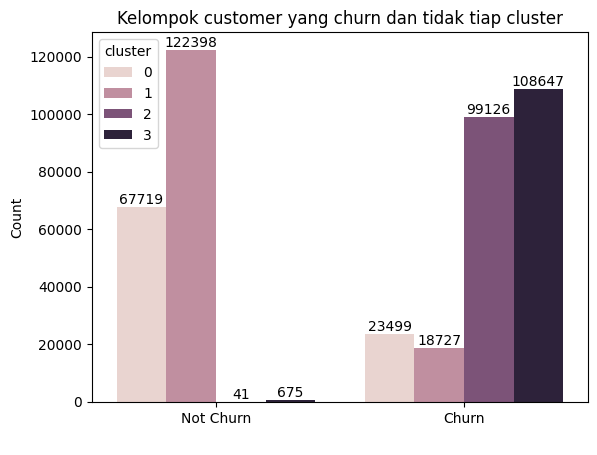

In [76]:
# Plot churn dan cluster
ax = sns.countplot(df_clustered , x = 'churn' , hue = 'cluster')
plt.title('Kelompok customer yang churn dan tidak tiap cluster')
plt.xticks(ticks = [0, 1] , labels = ['Not Churn','Churn'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

- Berdasarkan grafik di atas, perhatikan bar chart bagian Churn. Terlihat bahwa cluster 2 dan 3 cenderung mengalami churn yang sangat tinggi.
- Berkebalikan dengan cluster 2 dan 3, cluster 1 di bagian Non Churn justru menampilkan nilai loyalitas yang sangat tinggi.

Text(0.5, 1.0, 'Heatmap Nilai Rata-rata tiap Cluster')

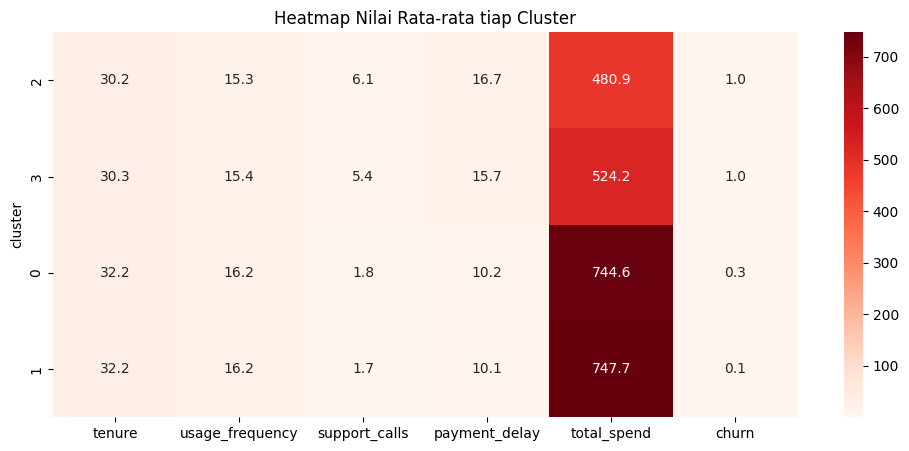

In [62]:
# Heatmap rata-rata tiap cluster dan kaitannya dengan churn
mean = df_clustered.groupby('cluster')[['tenure', 'usage_frequency','support_calls','payment_delay','total_spend', 'churn']].mean().sort_values('total_spend')
fig = plt.figure(figsize = (12,5))
sns.heatmap(data = mean , cmap = 'Reds' , annot = True, fmt = ".1f" )
plt.title('Heatmap Nilai Rata-rata tiap Cluster')

> Churn dan Total Spend
- Hal yang menarik dari heatmap di atas adalah customer yang mengalami churn adalah customer dengan total spend paling sedikit. Hal ini ditunjukan dari cluster 3 dan 2.
- Sedangkan cluster dengan total spend terbanyak, memiliki kecenderungan churn yang sangat sedikit. 

> Churn dan Payment Delay
- Customer pada cluster 3 dan 2 yang mengalami churn memiliki rata-rata payment delay paling lama dibanding cluster 1 dan 0.
- Sehingga hal ini memunculkan dugaan bahwa mungkin ada kurangnya daya beli terhadap produk kita sehingga mengalami keterlambatan dalam membayar dan berujung beralih ke perusahaan lain (churn).

> Churn dan Support Calls
- Customer pada cluster 3 dan 2 juga lebih sering melakukan support calls dibandingkan cluster 1 dan 0 yang rata-ratanya hanya 1 atau 2 kali dalam 1 bulan.
- Hal ini bisa jadi adanya perbedaan contract_length yang diambil antara cluster 3 & 2 dengan cluster 1 & 0.

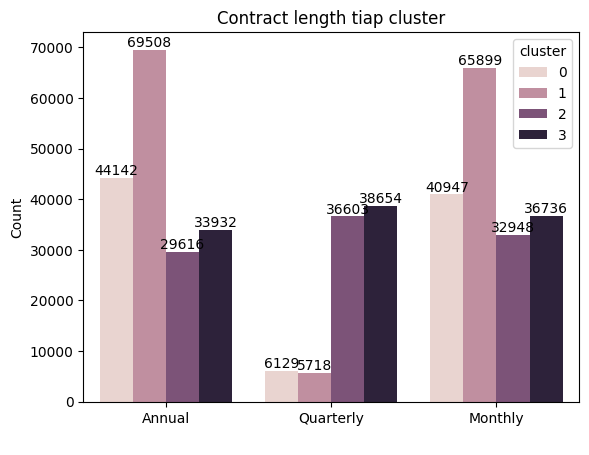

In [74]:
# Plot contract length dan cluster
ax = sns.countplot(df_clustered , x = 'contract_length' , hue = 'cluster')
plt.title('Contract length tiap cluster')
plt.xticks(ticks = [0, 1, 2] , labels = ['Annual','Quarterly', 'Monthly'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

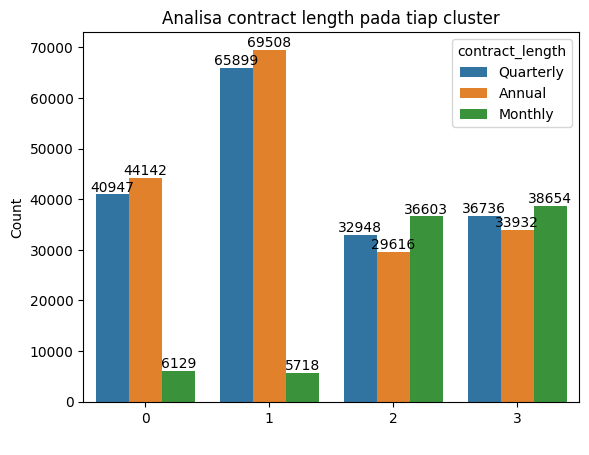

In [84]:
# Plot contract length dan cluster
ax = sns.countplot(df_clustered , x = 'cluster' , hue = 'contract_length')
plt.title('Analisa contract length pada tiap cluster')
plt.xticks(ticks = [0, 1, 2, 3] , labels = ['0','1', '2', '3'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

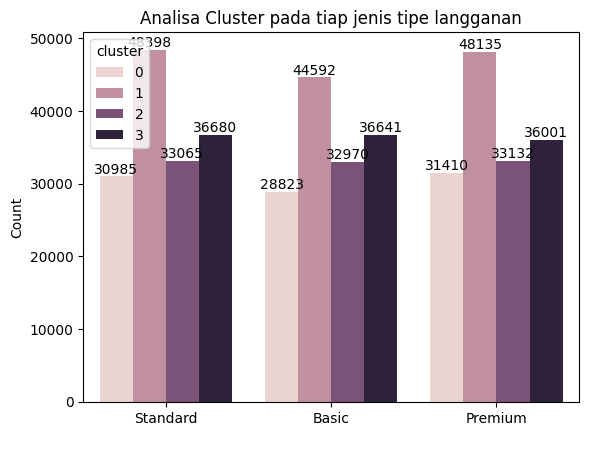

In [85]:
# Plot subscription type dan cluster
ax = sns.countplot(df_clustered , x = 'subscription_type' , hue = 'cluster')
plt.title('Analisa Cluster pada tiap jenis tipe langganan')
plt.xticks(ticks = [0, 1, 2] , labels = ['Standard', 'Basic', 'Premium'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

# E. Kesimpulan Analisa

- Cluster 1 merupakan customer yang memiliki daya beli yang tinggi dan efisien. Hal ini ditunjukkan dari pemilihan contract length yang lebih banyak pada pembayaran untuk per tahun (Annual), total spend yang paling banyak, keluhan yang sedikit, serta sudah berlangganan sangat lama. Sehingga dapat dikatakan bahwa cluster 1 adalah customer paling loyal dari semua cluster lainnya. Saran untuk merespon cluster 1 ini adalah menjaga kesetiaannya pada produk kita dengan memberikan reward seperti potongan harga.
